# Intuition

![figure](./cartoons/7.svg)

# Notations

## Bayesian Inference

Bayesian inference is a method of statistical inference in which we update our beliefs about a parameter as new data becomes available. The key components are:

- **Prior**: The initial belief or probability distribution about the parameter $\mu$ before observing data.
- **Likelihood**: The probability of observing the data given a particular value of the parameter $\mu$.
- **Posterior**: The updated belief about the parameter $\mu$ after incorporating the observed data.

Bayes' theorem provides the foundation for Bayesian inference:

$$
P(\mu|D) = \frac{P(D|\mu) P(\mu)}{P(D)}
$$

where:
- $ P(\mu|D) $ is the **posterior** distribution of the parameter $ \mu $ given the data $ D $.
- $ P(D|\mu) $ is the **likelihood** of the data given the parameter.
- $ P(\mu) $ is the **prior** distribution of $ \mu $.
- $ P(D) $ is the **marginal likelihood**, which normalizes the posterior distribution.

By ignoring the denominator (which does not depend on $\mu$), we can express this relationship as:

$$
P(\mu|D) \propto P(D|\mu) P(\mu)
$$


## Bayesian Normal Mean Model

### Model Assumptions

In the Bayesian normal mean model, we assume the variable $Y$ follows uni-variate normal model $\mathcal{N}(\mu, \sigma^2)$

$$
Y \sim \mathcal{N}(\mu, \sigma^2)
$$

where:
- $ \mu $ is the unknown mean parameter.
- $ \sigma^2 $ is the known variance.

And the Bayesian Normal Mean Model is to see what we can learn about the unknown parameter $\mu$.

### Prior Distribution

A common choice for the prior on $ \mu $ is a normal distribution:

$$
\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)
$$

where $ \mu_0 $ is the prior mean and $ \sigma_0^2 $ is the prior variance. 

The precision is defined as $\tau_0 = \frac{1}{\sigma_0^2}$. In other words, the prior of $\mu$ can be rewritten as:

$$
\mu \sim \mathcal{N}(\mu_0, \frac{1}{\tau_0})
$$

Therefore, the probability density function (PDF) is 

$$
\begin{align}
p(\mu)&\propto \exp\left(-\frac{1}{2}\tau_0\mu^2 + \tau_0\mu_0 \mu\right) \\
       &\propto \exp\left(-\frac{1}{2}\tau_0 (\mu - \mu_0)^2\right)
\end{align}
$$


(Here, the 0 subscript is used to indicate that $\mu_0$ and $\sigma_0$ are parameters in the prior.)


### Likelihood

The likelihood of the data given $\mu$ and $\sigma^2$ is:

$$
Y\mid\mu, \sigma^2 \sim \mathcal{N}(\mu, \sigma^2)
$$

The probability density function (PDF) is:

$$
\begin{align}
p(Y\mid\mu) &\propto \exp\left(-\frac{1}{2} \tau (Y^2 - 2\mu Y)\right)\\
&\propto \exp\left(-\frac{1}{2} \tau (Y - \mu)^2\right)
\end{align}
$$

where $\tau = \frac{1}{\sigma^2}$ is the precision.


### Posterior Distribution

Using Bayes' theorem, the posterior distribution of $ \mu $ is given by:

$$
p(\mu|Y) \propto p(Y|\mu) p(\mu)
$$

Expanding the probability density functions:

$$
\begin{align}
p(\mu \mid Y) &\propto \exp\left(-\frac{1}{2} \tau (Y - \mu)^2\right) \exp\left(-\frac{1}{2} \tau_0 (\mu - \mu_0)^2\right) \\
&\propto \exp\left(-\frac{1}{2} \tau (Y^2 - 2Y\mu + \mu^2) - \frac{1}{2} \tau_0 (\mu^2 - 2\mu \mu_0 + \mu_0^2)\right) \\
&\propto \exp\left(-\frac{1}{2} (\tau + \tau_0) \mu^2 + (\tau Y + \tau_0 \mu_0) \mu \right)
\end{align}
$$

Recognizing the quadratic form, the posterior distribution follows a normal distribution:

$$
\mu \mid Y \sim \mathcal{N}\left( \mu_1, \sigma_1^2 \right)
$$

where

$$
\mu_1 = \frac{\tau Y + \tau_0 \mu_0}{\tau + \tau_0}, \quad \sigma_1^2 = \frac{1}{\tau + \tau_0}
$$


**(double click here for the version for multiple samples)**
<!-- ## Normal Mean Model

Let’s now consider the normal mean model where we assume data points $z_1, z_2, \dots, z_n$ are drawn from a normal distribution with unknown mean $\mu$ and known variance $\sigma^2$:

$$
x_i \sim N(\mu, \sigma^2)
$$

In this case:

1. **Prior**: The prior distribution for the mean $\mu$ is often assumed to be normal with mean $\mu_0$ and variance $\sigma_0^2$, and let's work with the precision $\tau=\frac{1}{\sigma^2}$ instead of the variance $\sigma^2$.

$$
P(\mu) = \frac{1}{\sqrt{2 \pi \sigma_0^2}} \exp\left(-\frac{(\mu - \mu_0)^2}{2 \sigma_0^2}\right)\\
% \propto \exp\left(−0.5\tau_0\mu^2+\tau_0\mu_0\mu\right) \\
\propto \exp\left(−0.5\tau_0(\mu-\mu_0)^2\right)
$$

In other words, the prior of $\mu \sim N(\mu_0, \frac{1}{\sigma_0^2})$ (i.e., $\sim N(\mu_0, \tau_0$).
(Here the 0 subscript is being used to indicate that $\mu_0$, $\sigma_0$ are parameters in the prior.)


2. **Likelihood**: The likelihood of observing the data given $\mu$ is:

$$
P(D|\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2 \sigma^2}\right) \\
\propto \prod_{i=1}^{n}\exp\left(-\frac{(x_i - \mu)^2}{2 \sigma^2}\right) \\
% \propto \prod_{i=1}^{n}\exp\left(−0.5\tau x_i^2+\tau x_i\mu\right) \\
\propto \prod_{i=1}^{n} \exp\left(−0.5 \tau (x_i - \mu)^2\right)
$$

3. **Posterior**: The posterior distribution of $\mu$ given the data $D = \{x_1, x_2, \dots, x_n\}$ combines the prior and likelihood using Bayes' theorem. The formula for the posterior is proportional to:

$$
P(\mu|D) \propto P(D|\mu) P(\mu) \\
\propto \prod_{i=1}^{n} \exp\left(−0.5 \tau (x_i - \mu)^2\right) \times \exp\left(−0.5 \tau_0 (\mu - \mu_0)^2\right)\\
\propto \exp\left[−0.5 \tau \sum_{i=1}^{n} (x_i - \mu)^2 − 0.5 \tau_0 (\mu - \mu_0)^2\right]\\
\propto \exp\left[−0.5 (\tau + \tau_0) \mu^2 + \left( \sum_{i=1}^{n} x_i \tau + \mu_0 \tau_0 \right) \mu \right]
$$

From the result in “Preliminaries” above we see that
$$
\mu | X \sim N(\mu_1, \frac{1}{\tau_1})
$$
where:
- $\tau_1 = \tau + \tau_0$ is the posterior precision (i.e., $\sigma_1^2 = \frac{1}{\frac{1}{\sigma_1^2} + \frac{n}{\sigma^2}}$ is the posterior variance.)
- $\mu_1 = \frac{\sum_{i=1}^{n} x_i \tau + \mu_0 \tau_0}{\tau + \tau_0}$ is the posterior mean. -->

## Summary
- **Bayes' theorem** combines these components: $P(\mu|D) \propto P(D|\mu) P(\mu)$.
- The **prior** represents our belief about the parameter before seeing any data.
- The **likelihood** represents how likely we are to observe the data given the parameter.
- The **posterior** is the updated belief about the parameter after seeing the data.
    - the **Posterior precision** ($\tau_1$) is the sum of the Data precision ($\tau$) and the Prior precision ($\tau_0$). This makes sense: the more precise your data, and the more precise your prior information, the more precise your posterior information. Also, this means that the data always improves your posterior precision compared with the prior: noisy data (small $\tau$) improves it only a little, whereas precise data improves it a lot.
    - If we rewrite the **posterior mean** as:
    $$
    \mu_1=w\sum_i^n x_i+(1−w)\mu_0
    $$
    where $w=\tau/(\tau+\tau_0)$. Thus $\mu_1$ is a weighted average of the sum of the data $x_i$ and the prior mean $\mu_0$. And the weights depend on the relative precision of the data and the prior. If the data are precise compared with the prior ($\tau>>\tau_0$) then the weight w will be close to 1 and the posterior mean will be close to the data.
- Model comparison in Bayesian inference is performed using Bayes factors.

# Example

## Description

We consider a scenario where we study the height ($Y$) of individuals who do not carry any risk allele (genotype "00"). We assume that height follows a univariate normal distribution within this genotype class:
$$
Y | \mu, \sigma^2 \sim \mathcal{N}(\mu, \sigma^2)
$$

where $\mu$ is the unknown mean height, and $\sigma^2$ is the known variance within this genotype group. Our goal is to estimate $\mu$ using Bayesian inference.

In [95]:
rm(list=ls())
library(ggplot2)

## Prior Distribution

We assume a normal prior for $\mu$:

$$
\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)
$$

where:

- \$\mu\_0 = 160\$ cm (prior mean height),
- \$\sigma\_0^2 = 1\$ cm\$^2\$ (prior variance), leading to a precision \$\tau\_0 = 1/\sigma\_0^2\$.

In [96]:
# Prior distribution of mu
mu_0 <- 160  # Prior mean
sigma_0 <- 1  # Prior standard deviation
tau_0 <- 1 / sigma_0^2  # Prior precision
print(paste("Prior mean (mu_0):", mu_0))
print(paste("Prior standard deviation (sigma_0):", sigma_0))
print(paste("Prior precision (tau_0):", tau_0))

[1] "Prior mean (mu_0): 160"
[1] "Prior standard deviation (sigma_0): 1"
[1] "Prior precision (tau_0): 1"


## Observed Data and the likelihood function

We observe heights of three individuals from the genotype class "00", and we assume the likelihood follows:

$$
Y | \mu \sim \mathcal{N}(\mu, \sigma^2)
$$

In [98]:
# Observed data (heights of three individuals)
Y <- c(168, 173, 171)
n <- length(Y)
print(paste("Observed heights (Y):", paste(Y, collapse = ", ")))
print(paste("Number of observations (n):", n))

[1] "Observed heights (Y): 168, 173, 171"
[1] "Number of observations (n): 3"


In [99]:
# Likelihood: Assumption - Heights follow N(mu, sigma^2) with known variance
sigma <- 1  # Known standard deviation for heights within genotype class "00"
tau <- 1 / sigma^2  # Precision
print(paste("Likelihood standard deviation (sigma):", sigma))
print(paste("Likelihood precision (tau):", tau))

[1] "Likelihood standard deviation (sigma): 1"
[1] "Likelihood precision (tau): 1"


### Posterior Distribution Update

Using Bayesian updating, the posterior distribution is given by:

$$
\mu | Y \sim \mathcal{N}(\mu_1, \sigma_1^2)
$$

where:

- **Posterior precision**:
  $\tau_1 = \tau_0 + n \tau$
- **Posterior mean**:
  $\mu_1 = \frac{\tau_0 \mu_0 + \tau \sum Y}{\tau_1}$
- **Posterior standard deviation**:
  $\sigma_1 = \sqrt{\frac{1}{\tau_1}}$


In [100]:
# Posterior parameters update
tau_1 <- tau_0 + n * tau  # Posterior precision
sigma_1 <- sqrt(1 / tau_1)  # Posterior standard deviation
mu_1 <- (tau_0 * mu_0 + tau * sum(Y)) / tau_1  # Posterior mean
print(paste("Posterior mean (mu_1):", mu_1))
print(paste("Posterior standard deviation (sigma_1):", sigma_1))
print(paste("Posterior precision (tau_1):", tau_1))


[1] "Posterior mean (mu_1): 168"
[1] "Posterior standard deviation (sigma_1): 0.5"
[1] "Posterior precision (tau_1): 4"


## Plot the prior and posterior distribution

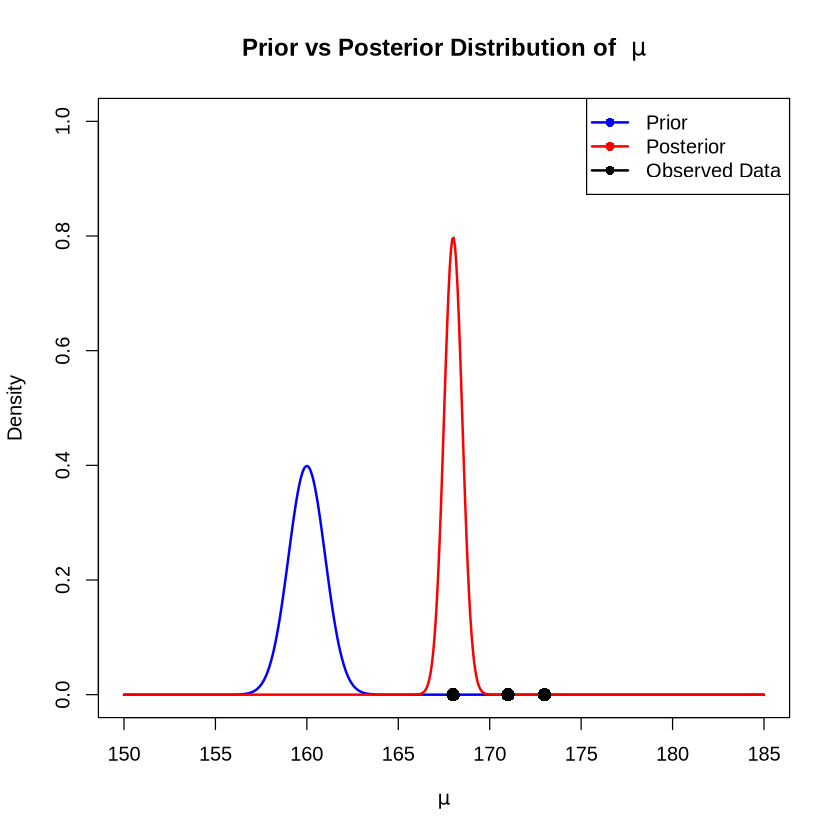

In [102]:
# Plot the prior distribution
curve(dnorm(x, mu_0, sigma_0), from = 150, to = 185, col = "blue", lwd = 2, 
      xlab = expression(mu), ylab = "Density", main = expression(bold("Prior vs Posterior Distribution of " ~ mu)),
     ylim = c(0,1), n=500)

# Add the posterior distribution
curve(dnorm(x, mu_1, sigma_1), from = 150, to = 185, col = "red", lwd = 2, add = TRUE, n=500)

# Add three observations (data points)
points(Y, rep(0, length(Y)), col = "black", pch = 16, cex = 1.5)

# Add legend
legend("topright", legend = c("Prior", "Posterior", "Observed Data"), col = c("blue", "red", "black"), lwd = 2, pch = 16)

### Explanation of Results

The posterior mean and variance have changed compared to the prior because the observed data are larger than the prior mean.

- **Posterior Mean ($\mu_1$):** The observed data (168, 173, and 171) are larger than the prior mean of 160, so the posterior mean shifts towards the observed data, now estimated around 168. This shift reflects the new evidence provided by the data.

- **Posterior Variance ($\sigma_1$):** The posterior variance is smaller than the prior variance because the observed data provides more information. With more data, we become more confident in our estimate, which narrows the distribution around the posterior mean.

In summary, the posterior mean shifts towards the data, and the posterior variance decreases because we gain more evidence, increasing our certainty.
